## Stitching images from 1 to 48


SuperGlue executed successfully!


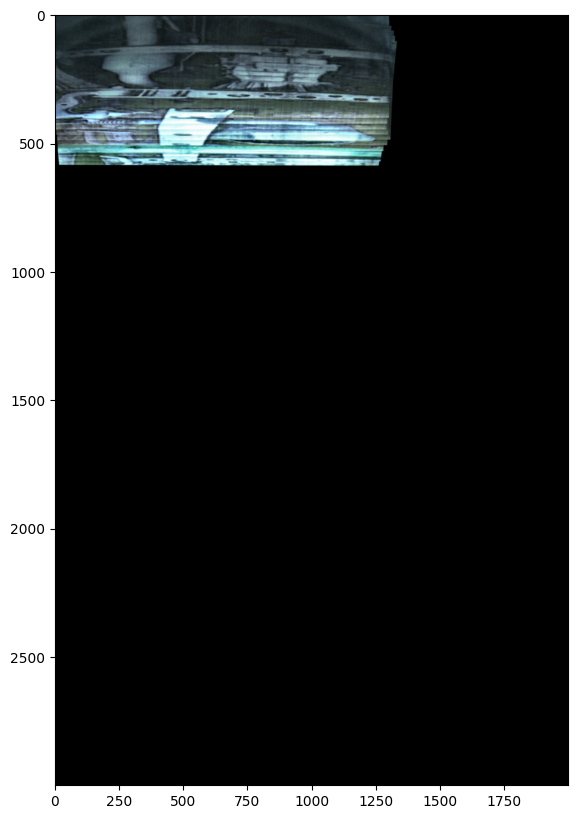

----------------------------------------------------------------------------------------------------


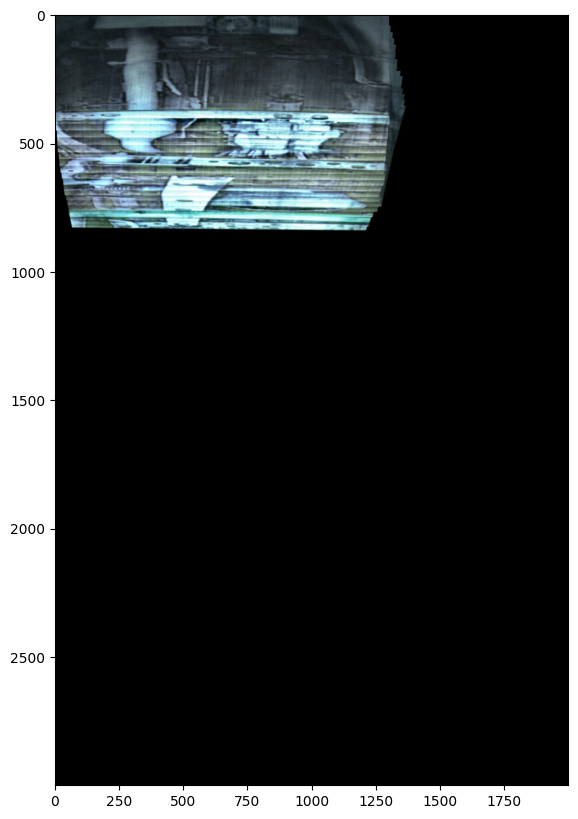

----------------------------------------------------------------------------------------------------


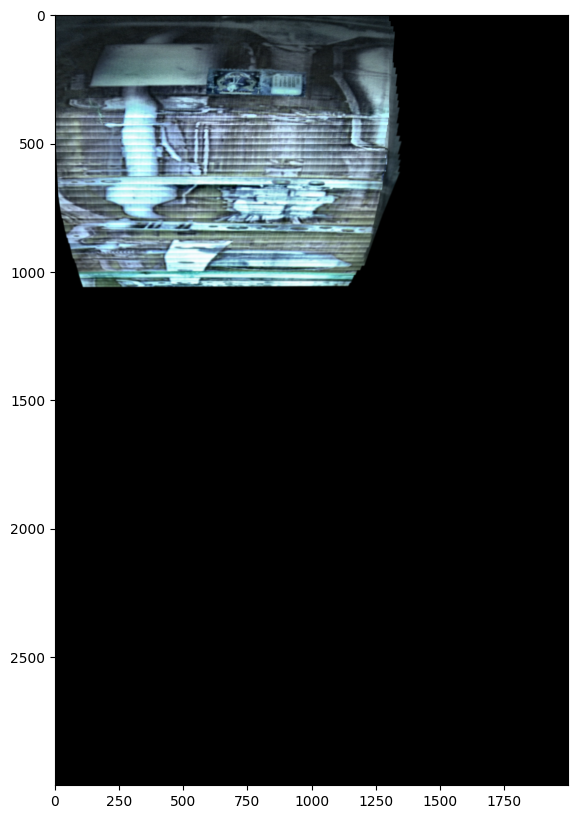

----------------------------------------------------------------------------------------------------


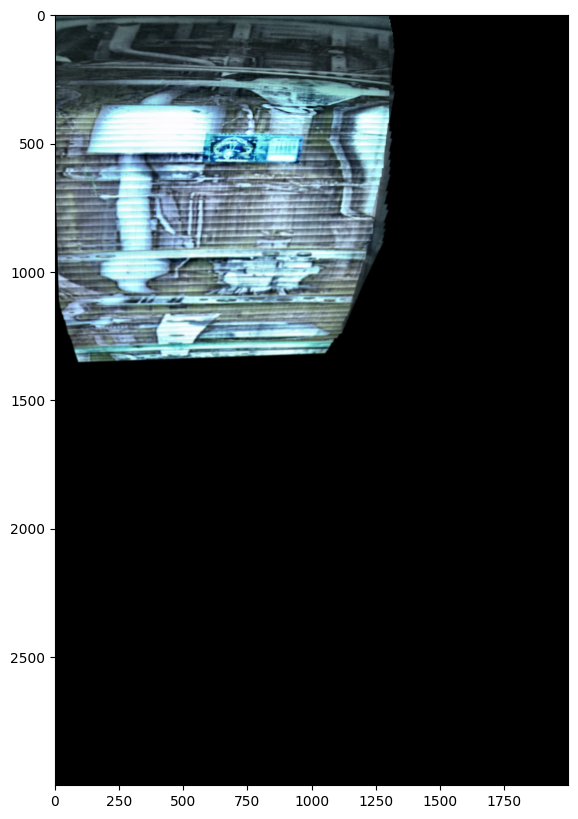

----------------------------------------------------------------------------------------------------


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Generating the necessary txt file to input for the SuperGlue algorithm
# Generate the necessary TXT file for SuperGlue
def generate_txt_file(filename, image_pairs):
    with open(filename, 'w') as file:
        for pair in image_pairs:
            if not os.path.exists(f"adobe_panorama/output/{pair[1]}_{pair[0]}_matches.npz"):
              print("npz file already not exisiting ", f"adobe_panorama/{pair[1]}_{pair[0]}_matches.npz")  
              file.write(f"{pair[1]}.jpg {pair[0]}.jpg\n")


import subprocess

def run_superglue(input_dir, output_dir, txt_filename='adobe_panorama.txt'):
    command = [
        "python", "match_pairs.py",
        "--resize", "-1",
        "--superglue", "outdoor",
        "--max_keypoints", "2048",
        "--nms_radius", "5",
        "--resize_float",
        "--input_dir", input_dir,
        "--input_pairs", txt_filename,
        "--output_dir", output_dir,
        "--viz",
        "--keypoint_threshold", "0.05",
        "--match_threshold", "0.9"
    ]
    
    try:
        # Running the command
        subprocess.run(command, check=True)
        print("SuperGlue executed successfully!")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")


def load_npz(npz_file, output_dir):    
    npz = np.load(f'{output_dir}/{npz_file}')
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]  
    point_set2 = npz['keypoints1'][matching_indexes]
    return point_set1, point_set2

def plt_source_images(image_set, point_set1, point_set2, input_dir):    
    im_left = cv.imread(f'{input_dir}/{image_set}.jpg', cv.IMREAD_ANYCOLOR)
    im_right = cv.imread(f'{input_dir}/{image_set-1}.jpg', cv.IMREAD_ANYCOLOR)
    
    for point in point_set1.astype(np.int32):
        cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    for point in point_set2.astype(np.int32):
        cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    fig = plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(im_left, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122), plt.imshow(im_right, cmap='gray', vmin=0, vmax=255)
    plt.show()

def stitch_images(start_img, end_img, input_dir, output_dir, result_dir):
    npz_files = [f"{i}_{i-1}_matches.npz" for i in range(start_img + 1, end_img + 1)]
    stitched_image = cv.imread(f'{input_dir}/{start_img}.jpg', cv.IMREAD_ANYCOLOR)
    
    for img_set in range(start_img + 1, end_img + 1):  
        point_set1, point_set2 = load_npz(npz_files[img_set - start_img - 1], output_dir)
        # plt_source_images(img_set, point_set1, point_set2, input_dir)
        
        im_left = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_right = stitched_image
        
        H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)
        
        panorama = cv.warpPerspective(im_right, np.linalg.inv(H), (2000, 3000))
        panorama[0:im_left.shape[0], 0:im_left.shape[1]] = im_left
        
        stitched_image = panorama
        
        if img_set%10==0:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)
    
    cv.imwrite(f'{result_dir}/final_result.jpg', stitched_image)

if __name__ == "__main__":
    # Define key parameters for easy modifications
    start_index = 1
    end_index = 48
    input_directory = 'adobe_panorama/'
    output_directory = 'adobe_panorama/output'
    result_directory = 'adobe_panorama/results'
    txt_filename = 'adobe_panorama.txt'

    # Run the functions with defined parameters
    # Run the functions with defined parameters
    first_half_pairs = [(i, i-1) for i in range(2, 49)]
    generate_txt_file(txt_filename,first_half_pairs)
    run_superglue(input_directory, output_directory, txt_filename)
    
    stitch_images(start_index, end_index, input_directory, output_directory, result_directory)


## Reverse Stitching From 48 to 1

SuperGlue executed successfully!
Number of matching points for the findHomography algorithm:
In left  image: 99 
In right image: 99
Number of matching points for the findHomography algorithm:
In left  image: 96 
In right image: 96
Number of matching points for the findHomography algorithm:
In left  image: 83 
In right image: 83
Number of matching points for the findHomography algorithm:
In left  image: 87 
In right image: 87
Number of matching points for the findHomography algorithm:
In left  image: 75 
In right image: 75
Number of matching points for the findHomography algorithm:
In left  image: 75 
In right image: 75
Number of matching points for the findHomography algorithm:
In left  image: 78 
In right image: 78
Number of matching points for the findHomography algorithm:
In left  image: 85 
In right image: 85


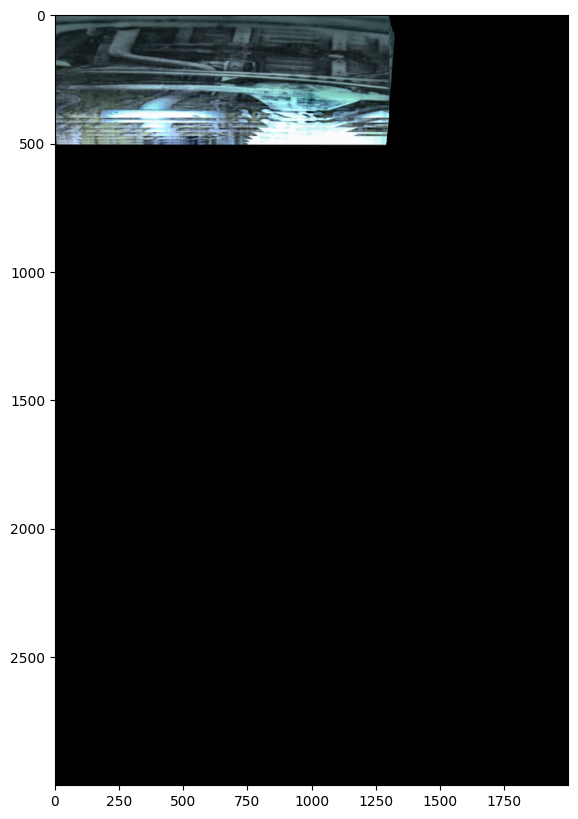

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 75 
In right image: 75
Number of matching points for the findHomography algorithm:
In left  image: 61 
In right image: 61
Number of matching points for the findHomography algorithm:
In left  image: 63 
In right image: 63
Number of matching points for the findHomography algorithm:
In left  image: 56 
In right image: 56
Number of matching points for the findHomography algorithm:
In left  image: 48 
In right image: 48
Number of matching points for the findHomography algorithm:
In left  image: 43 
In right image: 43
Number of matching points for the findHomography algorithm:
In left  image: 58 
In right image: 58
Number of matching points for the findHomography algorithm:
In left  image: 62 
In right image: 62
Number of matching points for the findHomography algorithm:
In left  image: 66 
In right image: 66
Number o

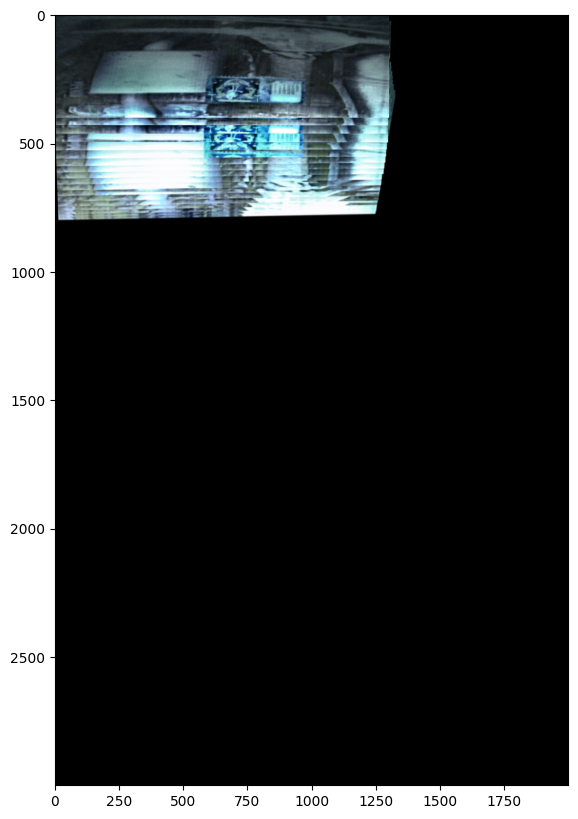

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 61 
In right image: 61
Number of matching points for the findHomography algorithm:
In left  image: 70 
In right image: 70
Number of matching points for the findHomography algorithm:
In left  image: 50 
In right image: 50
Number of matching points for the findHomography algorithm:
In left  image: 49 
In right image: 49
Number of matching points for the findHomography algorithm:
In left  image: 38 
In right image: 38
Number of matching points for the findHomography algorithm:
In left  image: 30 
In right image: 30
Number of matching points for the findHomography algorithm:
In left  image: 34 
In right image: 34
Number of matching points for the findHomography algorithm:
In left  image: 28 
In right image: 28
Number of matching points for the findHomography algorithm:
In left  image: 29 
In right image: 29
Number o

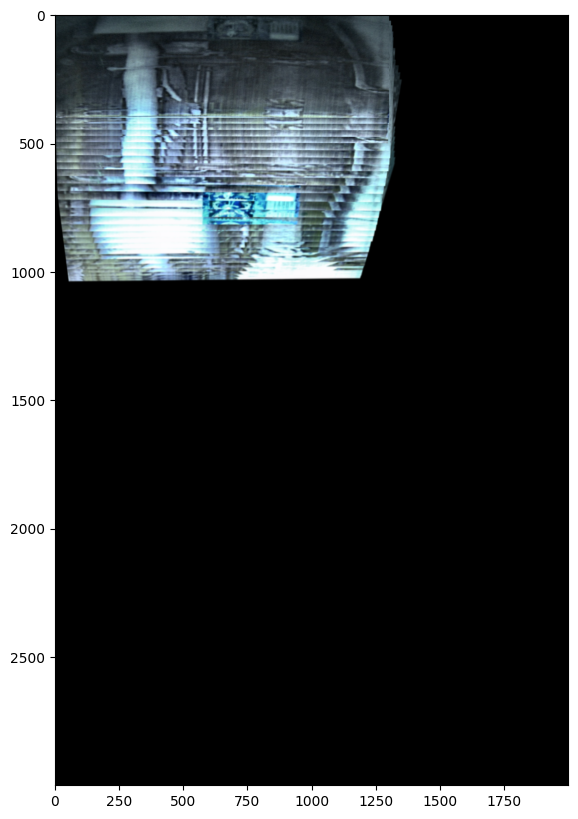

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 35 
In right image: 35
Number of matching points for the findHomography algorithm:
In left  image: 24 
In right image: 24
Number of matching points for the findHomography algorithm:
In left  image: 38 
In right image: 38
Number of matching points for the findHomography algorithm:
In left  image: 50 
In right image: 50
Number of matching points for the findHomography algorithm:
In left  image: 49 
In right image: 49
Number of matching points for the findHomography algorithm:
In left  image: 55 
In right image: 55
Number of matching points for the findHomography algorithm:
In left  image: 58 
In right image: 58
Number of matching points for the findHomography algorithm:
In left  image: 74 
In right image: 74
Number of matching points for the findHomography algorithm:
In left  image: 83 
In right image: 83
Number o

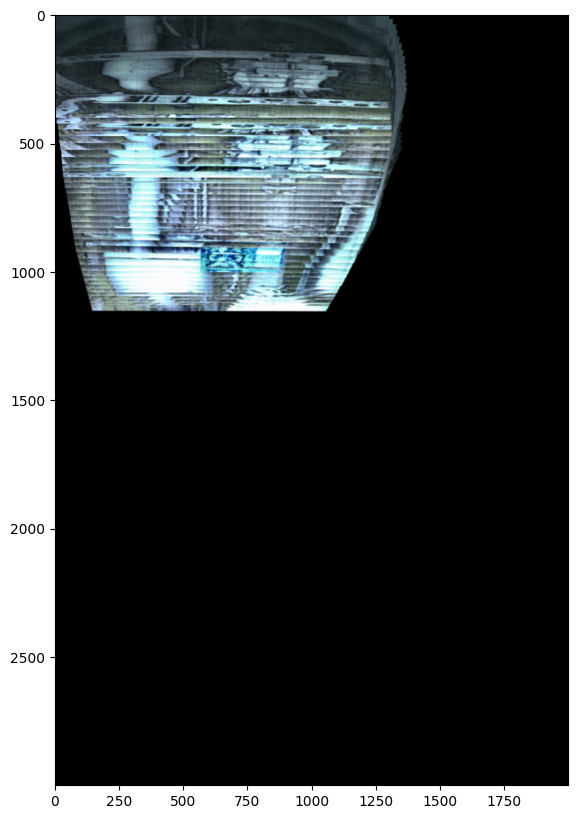

----------------------------------------------------------------------------------------------------
Number of matching points for the findHomography algorithm:
In left  image: 70 
In right image: 70
Number of matching points for the findHomography algorithm:
In left  image: 77 
In right image: 77
Number of matching points for the findHomography algorithm:
In left  image: 58 
In right image: 58
Number of matching points for the findHomography algorithm:
In left  image: 48 
In right image: 48
Number of matching points for the findHomography algorithm:
In left  image: 59 
In right image: 59
Number of matching points for the findHomography algorithm:
In left  image: 48 
In right image: 48
Number of matching points for the findHomography algorithm:
In left  image: 65 
In right image: 65
Number of matching points for the findHomography algorithm:
In left  image: 53 
In right image: 53
Number of matching points for the findHomography algorithm:
In left  image: 53 
In right image: 53


In [5]:

    
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Generating the necessary txt file to input for the SuperGlue algorithm
# Generate the necessary TXT file for SuperGlue
def generate_txt_file(filename, image_pairs):
    with open(filename, 'w') as file:
        for pair in image_pairs:
            if not os.path.exists(f"adobe_panorama/output/{pair[1]}_{pair[0]}_matches.npz"):
              print("npz file already not exisiting ", f"adobe_panorama/{pair[1]}_{pair[0]}_matches.npz")  
              file.write(f"{pair[1]}.jpg {pair[0]}.jpg\n")


import subprocess

def run_superglue(input_dir, output_dir, txt_filename='adobe_panorama.txt'):
    command = [
        "python", "match_pairs.py",
        "--resize", "-1",
        "--superglue", "outdoor",
        "--max_keypoints", "2048",
        "--nms_radius", "5",
        "--resize_float",
        "--input_dir", input_dir,
        "--input_pairs", txt_filename,
        "--output_dir", output_dir,
        "--viz",
        "--keypoint_threshold", "0.05",
        "--match_threshold", "0.9"
    ]
    
    try:
        # Running the command
        subprocess.run(command, check=True)
        print("SuperGlue executed successfully!")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")


def load_npz(npz_file, output_dir):    
    npz = np.load(f'{output_dir}/{npz_file}')
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]  
    point_set2 = npz['keypoints1'][matching_indexes]
    print("Number of matching points for the findHomography algorithm:")
    print("In left  image:", len(point_set1), "\nIn right image:", len(point_set2))
    return point_set1, point_set2

def stitch_images_reverse(start_img, end_img, input_dir, output_dir, result_dir):
    npz_files = [f"{i-1}_{i}_matches.npz" for i in range(end_img, start_img, -1)]
    stitched_image = cv.imread(f'{input_dir}/{end_img}.jpg', cv.IMREAD_ANYCOLOR)
    
    for img_set in range(end_img, start_img, -1):  
        point_set1, point_set2 = load_npz(npz_files[end_img - img_set], output_dir)
        # plt_source_images(img_set, point_set1, point_set2, input_dir)
        
        im_right = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_left = stitched_image
        
        H, status = cv.findHomography(point_set2, point_set1, cv.RANSAC, 5.0)
        panorama = cv.warpPerspective(im_left, np.linalg.inv(H), (2000, 3000))
        panorama[0:im_right.shape[0], 0:im_right.shape[1]] = im_right
        
        stitched_image = panorama
        if img_set%10==1:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)
    
    cv.imwrite(f'{result_dir}/final_result_reverse.jpg', stitched_image)

if __name__ == "__main__":
    # Define key parameters for easy modifications
    start_index = 1
    end_index = 48
    input_directory = 'adobe_panorama/'
    output_directory = 'adobe_panorama/output'
    result_directory = 'adobe_panorama/results'
    txt_filename = 'adobe_panorama.txt'

    # Run the functions with defined parameters
    # Run the functions with defined parameters
    first_half_pairs = [(i, i+1) for i in range(1, 48)]
    generate_txt_file(txt_filename,first_half_pairs)
    run_superglue(input_directory, output_directory, txt_filename)
    
    stitch_images_reverse(start_index, end_index, input_directory, output_directory, result_directory)


# Example usage
# stitch_images_reverse(start_index, end_index, input_directory, output_directory, result_directory)


## Code with blending

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Generating the necessary txt file to input for the SuperGlue algorithm
# Generate the necessary TXT file for SuperGlue
def generate_txt_file(filename, image_pairs):
    with open(filename, 'w') as file:
        for pair in image_pairs:
            if not os.path.exists(f"adobe_panorama/output/{pair[1]}_{pair[0]}_matches.npz"):
              print("npz file already not exisiting ", f"adobe_panorama/{pair[1]}_{pair[0]}_matches.npz")  
              file.write(f"{pair[1]}.jpg {pair[0]}.jpg\n")


import subprocess

def run_superglue(input_dir, output_dir, txt_filename='adobe_panorama.txt'):
    command = [
        "python", "match_pairs.py",
        "--resize", "-1",
        "--superglue", "outdoor",
        "--max_keypoints", "2048",
        "--nms_radius", "5",
        "--resize_float",
        "--input_dir", input_dir,
        "--input_pairs", txt_filename,
        "--output_dir", output_dir,
        "--viz",
        "--keypoint_threshold", "0.05",
        "--match_threshold", "0.9"
    ]
    
    try:
        # Running the command
        subprocess.run(command, check=True)
        print("SuperGlue executed successfully!")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")


def load_npz(npz_file, output_dir):    
    npz = np.load(f'{output_dir}/{npz_file}')
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]  
    point_set2 = npz['keypoints1'][matching_indexes]
    return point_set1, point_set2

def plt_source_images(image_set, point_set1, point_set2, input_dir):    
    im_left = cv.imread(f'{input_dir}/{image_set}.jpg', cv.IMREAD_ANYCOLOR)
    im_right = cv.imread(f'{input_dir}/{image_set-1}.jpg', cv.IMREAD_ANYCOLOR)
    
    for point in point_set1.astype(np.int32):
        cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    for point in point_set2.astype(np.int32):
        cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    fig = plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(im_left, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122), plt.imshow(im_right, cmap='gray', vmin=0, vmax=255)
    plt.show()

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def get_vertical_feathered_mask(height, width, overlap_height, feather):
    """
    Creates a vertically feathered mask for smooth blending.
    """
    mask = np.zeros((height, width), dtype=np.float32)
    mask[:overlap_height - feather // 2, :] = 1.0  # Fully visible in upper region

    for i in range(overlap_height - feather // 2, overlap_height + feather // 2):
        feather_factor = (overlap_height + feather // 2 - i) / feather
        mask[i, :] = np.clip(feather_factor, 0, 1)  # Smooth transition

    return mask

def blend_images_vertical(im_top, im_bottom, overlap_height, feather):
    """
    Blends two vertically overlapping images using a feathered mask.
    """
    height, width = im_top.shape[:2]
    mask = get_vertical_feathered_mask(height, width, overlap_height, feather)
    mask = mask[:, :, None]  # Expand for 3 color channels
    mask = cv.resize(mask, (im_top.shape[1], im_top.shape[0]))
    # Blend images with the mask
    blended = im_top * mask + im_bottom * (1 - mask)
    return blended.astype(np.uint8)

def stitch_images(start_img, end_img, input_dir, output_dir, result_dir, overlap_height=200, feather=50):
    """
    Stitches images vertically using homography and blends the overlapping region.
    """
    npz_files = [f"{i}_{i-1}_matches.npz" for i in range(start_img + 1, end_img + 1)]
    stitched_image = cv.imread(f'{input_dir}/{start_img}.jpg', cv.IMREAD_ANYCOLOR)

    for img_set in range(start_img + 1, end_img + 1):  
        point_set1, point_set2 = load_npz(npz_files[img_set - start_img - 1], output_dir)
        
        im_top = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_bottom = stitched_image  # Previous stitched image

        H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)
        
        # Warp the lower image to align with the top image
        panorama = cv.warpPerspective(im_bottom, np.linalg.inv(H), (2000,4000))

        # Blend the overlapping region
        panorama[:im_top.shape[0], :] = blend_images_vertical(im_top, panorama[:im_top.shape[0], :], overlap_height, feather)
        
        stitched_image = panorama

        # Show intermediate results every 10 images
        if img_set % 10 == 0:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)

    cv.imwrite(f'{result_dir}/final_result.jpg', stitched_image)


if __name__ == "__main__":
    # Define key parameters for easy modifications
    start_index = 1
    end_index = 48
    input_directory = 'adobe_panorama/'
    output_directory = 'adobe_panorama/output'
    result_directory = 'adobe_panorama/results'
    txt_filename = 'adobe_panorama.txt'

    # Run the functions with defined parameters
    # Run the functions with defined parameters
    first_half_pairs = [(i, i-1) for i in range(2, 49)]
    generate_txt_file(txt_filename,first_half_pairs)
    run_superglue(input_directory, output_directory, txt_filename)
    
    stitch_images(start_index, end_index, input_directory, output_directory, result_directory)


SuperGlue executed successfully!


ValueError: operands could not be broadcast together with shapes (400,1300,3) (400,1300) 

SuperGlue executed successfully!


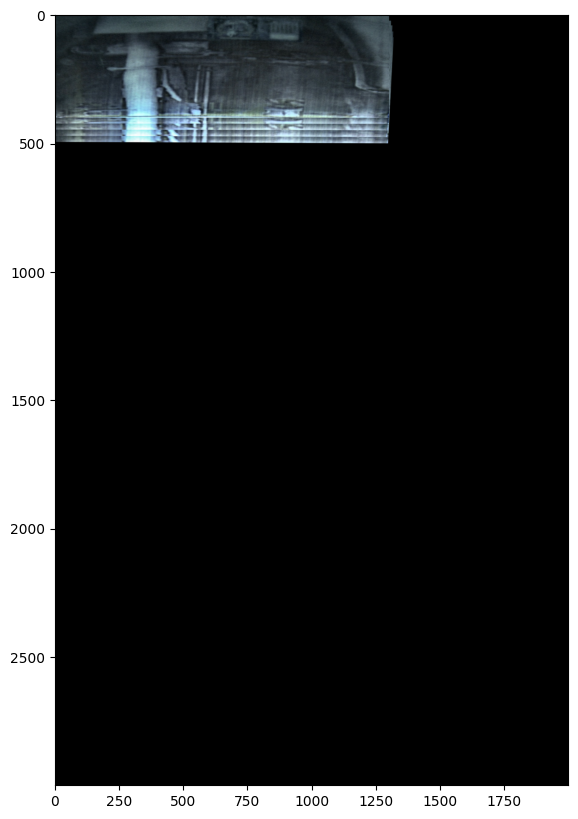

----------------------------------------------------------------------------------------------------


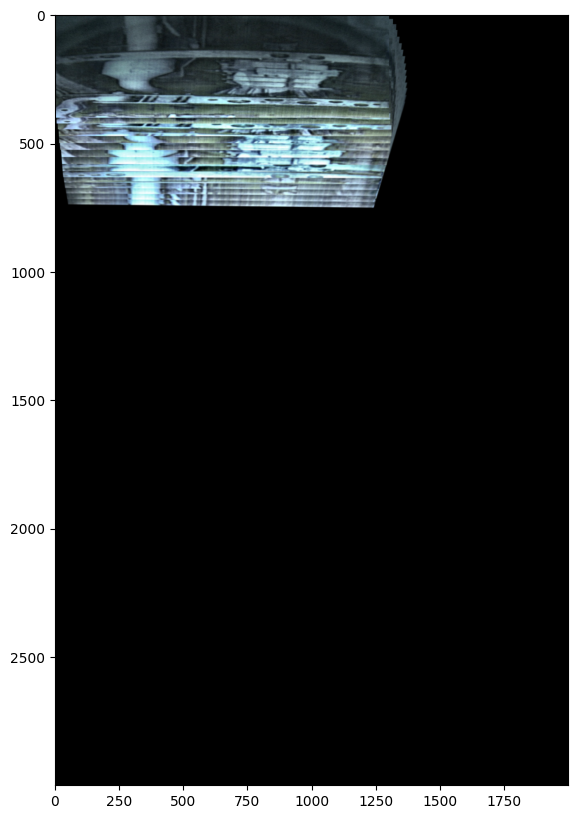

----------------------------------------------------------------------------------------------------
SuperGlue executed successfully!


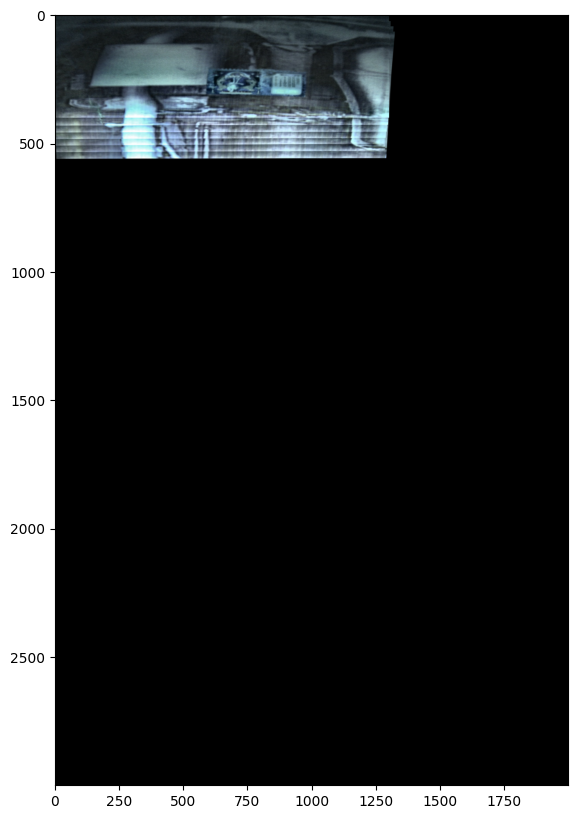

----------------------------------------------------------------------------------------------------


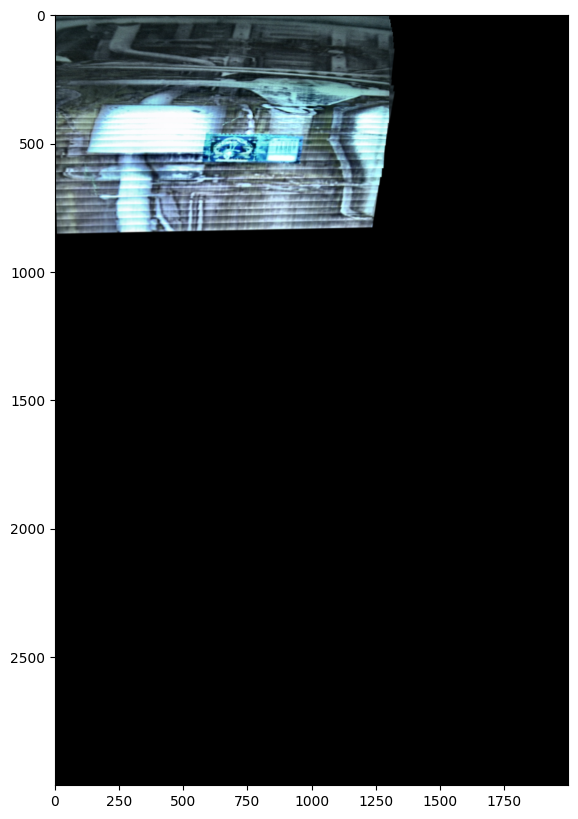

----------------------------------------------------------------------------------------------------
SuperGlue executed successfully!


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:390: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'cv::findHomography'


In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Generating the necessary txt file to input for the SuperGlue algorithm
# Generate the necessary TXT file for SuperGlue
def generate_txt_file(filename, image_pairs):
    with open(filename, 'w') as file:
        for pair in image_pairs:
            if not os.path.exists(f"adobe_panorama/output/{pair[1]}_{pair[0]}_matches.npz"):
              print("npz file already not exisiting ", f"adobe_panorama/{pair[1]}_{pair[0]}_matches.npz")  
              file.write(f"{pair[1]}.jpg {pair[0]}.jpg\n")

import subprocess

def run_superglue(input_dir, output_dir, txt_filename='adobe_panorama.txt'):
    command = [
        "python", "match_pairs.py",
        "--resize", "-1",
        "--superglue", "outdoor",
        "--max_keypoints", "2048",
        "--nms_radius", "5",
        "--resize_float",
        "--input_dir", input_dir,
        "--input_pairs", txt_filename,
        "--output_dir", output_dir,
        "--viz",
        "--keypoint_threshold", "0.05",
        "--match_threshold", "0.9"
    ]
    
    try:
        # Running the command
        subprocess.run(command, check=True)
        print("SuperGlue executed successfully!")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")

def load_npz(npz_file, output_dir):    
    npz = np.load(f'{output_dir}/{npz_file}')
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]  
    point_set2 = npz['keypoints1'][matching_indexes]
    # print("Number of matching points for the findHomography algorithm:")
    # print("In left  image:", len(point_set1), "\nIn right image:", len(point_set2))
    return point_set1, point_set2

def plt_source_images(image_set, point_set1, point_set2, input_dir):    
    im_left = cv.imread(f'{input_dir}/{image_set}.jpg', cv.IMREAD_ANYCOLOR)
    im_right = cv.imread(f'{input_dir}/{image_set-1}.jpg', cv.IMREAD_ANYCOLOR)
    
    for point in point_set1.astype(np.int32):
        cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    for point in point_set2.astype(np.int32):
        cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    fig = plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(im_left, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122), plt.imshow(im_right, cmap='gray', vmin=0, vmax=255)
    plt.show()

def stitch_images(start_img, end_img, input_dir, output_dir, result_dir):
    npz_files = [f"{i}_{i-1}_matches.npz" for i in range(start_img + 1, end_img + 1)]
    stitched_image = cv.imread(f'{input_dir}/{start_img}.jpg', cv.IMREAD_ANYCOLOR)
    
    for img_set in range(start_img + 1, end_img + 1):  
        point_set1, point_set2 = load_npz(npz_files[img_set - start_img - 1], output_dir)
        # plt_source_images(img_set, point_set1, point_set2, input_dir)
        
        im_left = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_right = stitched_image
        
        H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)
        
        panorama = cv.warpPerspective(im_right, np.linalg.inv(H), (2000, 3000))
        panorama[0:im_left.shape[0], 0:im_left.shape[1]] = im_left
        
        stitched_image = panorama
        
        if img_set%10==0:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)
    
    cv.imwrite(f'{result_dir}/final_result.jpg', stitched_image)
    return stitched_image
def stitch_images_reverse(start_img, end_img, input_dir, output_dir, result_dir):
    npz_files = [f"{i-1}_{i}_matches.npz" for i in range(end_img, start_img, -1)]
    stitched_image = cv.imread(f'{input_dir}/{end_img}.jpg', cv.IMREAD_ANYCOLOR)
    
    for img_set in range(end_img, start_img, -1):  
        point_set1, point_set2 = load_npz(npz_files[end_img - img_set], output_dir)
        # plt_source_images(img_set, point_set1, point_set2, input_dir)
        
        im_right = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_left = stitched_image
        
        H, status = cv.findHomography(point_set2, point_set1, cv.RANSAC, 5.0)
        panorama = cv.warpPerspective(im_left, np.linalg.inv(H), (2000, 3000))
        panorama[0:im_right.shape[0], 0:im_right.shape[1]] = im_right
        
        stitched_image = panorama
        if img_set%10==1:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)
    
    cv.imwrite(f'{result_dir}/final_result_reverse.jpg', stitched_image)
    return stitched_image

def stitch_half_half(input_dir, output_dir, result_dir):
    # Step 1: Stitch First Half (24 to 1 in reverse)
    first_half_txt = 'first_half.txt'
    generate_txt_file(filename=first_half_txt, image_pairs=[(i, i-1) for i in range(24, 1, -1)])
    run_superglue(input_dir, output_dir, first_half_txt)
    first_half_image = stitch_images_reverse(1, 24, input_dir, output_dir, result_dir)

    # Step 2: Stitch Second Half (24 to 48)
    second_half_txt = 'second_half.txt'
    generate_txt_file(filename=second_half_txt, image_pairs=[(i-1, i) for i in range(24, 49)])
    run_superglue(input_dir, output_dir, second_half_txt)
    second_half_image = stitch_images(24, 48, input_dir, output_dir, result_dir)

    # Step 3: Match and Stitch Both Halves
    halves_dir = input_dir
    
    # Save both halves for SuperGlue matching
    cv.imwrite(f'{halves_dir}/f.jpg', first_half_image)
    cv.imwrite(f'{halves_dir}/s.jpg', second_half_image)

    # Generate TXT file for the two halves
    halves_txt = 'adobe_panorama.txt'
    with open(halves_txt, 'w') as file:
        file.write('f.jpg s.jpg\n')

    run_superglue(halves_dir, output_dir, halves_txt)

    # Step 4: Final Stitching of Both Halves
    point_set1, point_set2 = load_npz('f_s_matches.npz', output_dir)
    H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)
    print(H)

    final_panorama = cv.warpPerspective(second_half_image, np.linalg.inv(H), (4000, 3000))
    final_panorama[0:first_half_image.shape[0], 0:first_half_image.shape[1]] = first_half_image

    plt.figure(figsize=(15, 10))
    plt.imshow(final_panorama, cmap='gray', vmin=0, vmax=255)
    plt.show()

    cv.imwrite(f'{result_dir}/final_panorama.jpg', final_panorama)

if __name__ == "__main__":
    # Define key parameters for easy modifications
    start_index = 1
    end_index = 48
    input_directory = 'adobe_panorama/'
    output_directory = 'adobe_panorama/output'
    result_directory = 'adobe_panorama/results'
    txt_filename = 'adobe_panorama.txt'

    # Run the half-half stitching
    stitch_half_half(input_directory, output_directory, result_directory)


## Considering only Upper Half of the image

issue : not sufficient matches found after some iterations

In [5]:
import cv2 as cv
import os
save_folder= "cropped"
for i in range(1,49):

    image = cv.imread(f"adobe_panorama\{i}.jpg")

    # Get image dimensions
    height, width = image.shape[:2]

    # Crop the upper half
    upper_half = image[:height*4 //5, :]

    # Ensure the save folder exists
    os.makedirs(save_folder, exist_ok=True)

    # Get the filename and construct the save path
    save_path = os.path.join(save_folder, f"{i}.jpg")

    # Save the cropped image
    cv.imwrite(save_path, upper_half)
    print(f"Saved cropped image to {save_path}")


Saved cropped image to cropped\1.jpg
Saved cropped image to cropped\2.jpg
Saved cropped image to cropped\3.jpg
Saved cropped image to cropped\4.jpg
Saved cropped image to cropped\5.jpg
Saved cropped image to cropped\6.jpg
Saved cropped image to cropped\7.jpg
Saved cropped image to cropped\8.jpg
Saved cropped image to cropped\9.jpg
Saved cropped image to cropped\10.jpg
Saved cropped image to cropped\11.jpg
Saved cropped image to cropped\12.jpg
Saved cropped image to cropped\13.jpg
Saved cropped image to cropped\14.jpg
Saved cropped image to cropped\15.jpg
Saved cropped image to cropped\16.jpg
Saved cropped image to cropped\17.jpg
Saved cropped image to cropped\18.jpg
Saved cropped image to cropped\19.jpg
Saved cropped image to cropped\20.jpg
Saved cropped image to cropped\21.jpg
Saved cropped image to cropped\22.jpg
Saved cropped image to cropped\23.jpg
Saved cropped image to cropped\24.jpg
Saved cropped image to cropped\25.jpg
Saved cropped image to cropped\26.jpg
Saved cropped image t

npz file already not exisiting  adobe_panorama/2_1_matches.npz
npz file already not exisiting  adobe_panorama/3_2_matches.npz
npz file already not exisiting  adobe_panorama/4_3_matches.npz
npz file already not exisiting  adobe_panorama/5_4_matches.npz
npz file already not exisiting  adobe_panorama/6_5_matches.npz
npz file already not exisiting  adobe_panorama/7_6_matches.npz
npz file already not exisiting  adobe_panorama/8_7_matches.npz
npz file already not exisiting  adobe_panorama/9_8_matches.npz
npz file already not exisiting  adobe_panorama/10_9_matches.npz
npz file already not exisiting  adobe_panorama/11_10_matches.npz
npz file already not exisiting  adobe_panorama/12_11_matches.npz
npz file already not exisiting  adobe_panorama/13_12_matches.npz
npz file already not exisiting  adobe_panorama/14_13_matches.npz
npz file already not exisiting  adobe_panorama/15_14_matches.npz
npz file already not exisiting  adobe_panorama/16_15_matches.npz
npz file already not exisiting  adobe_pano

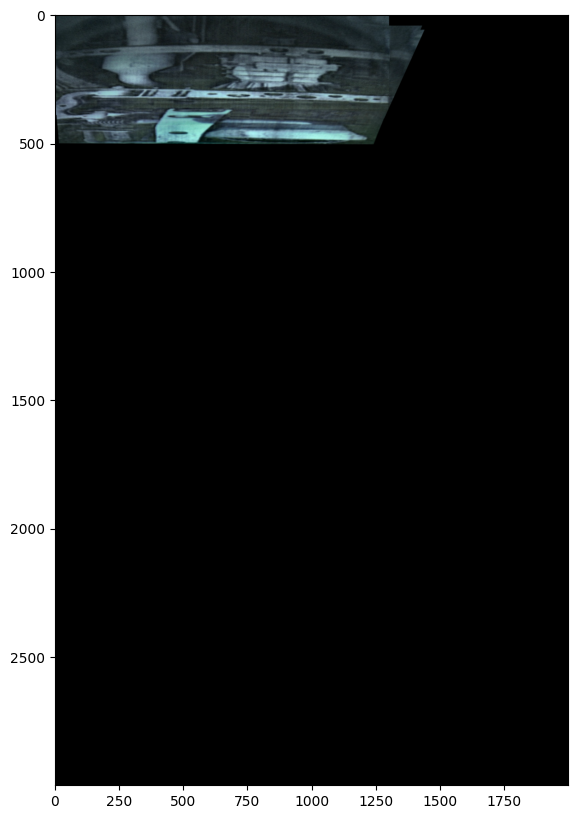

----------------------------------------------------------------------------------------------------


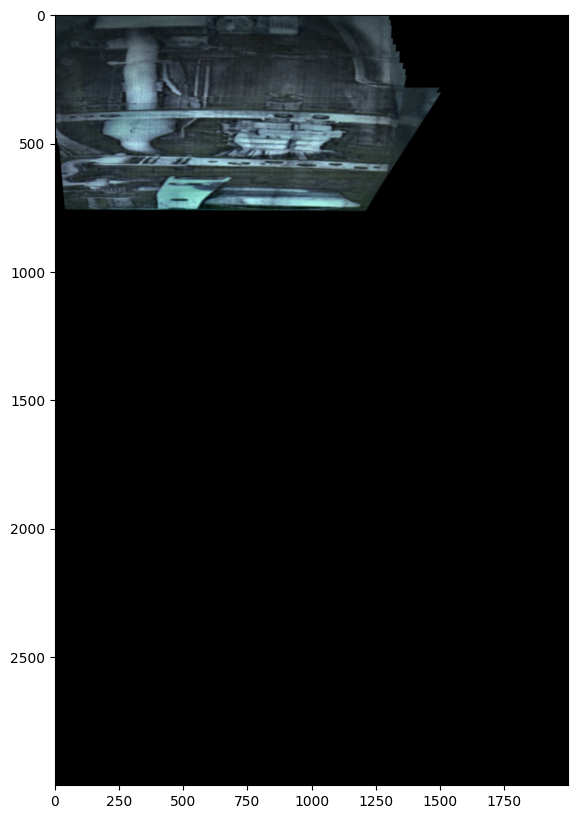

----------------------------------------------------------------------------------------------------


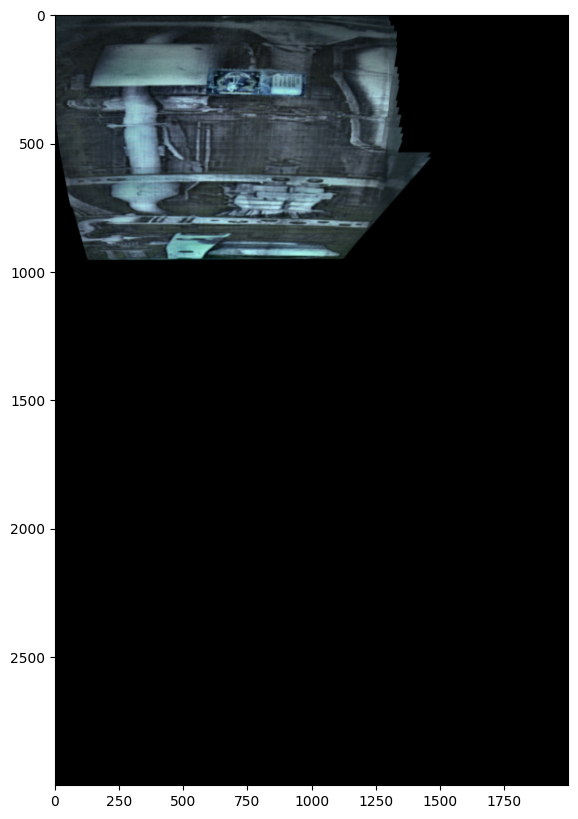

----------------------------------------------------------------------------------------------------


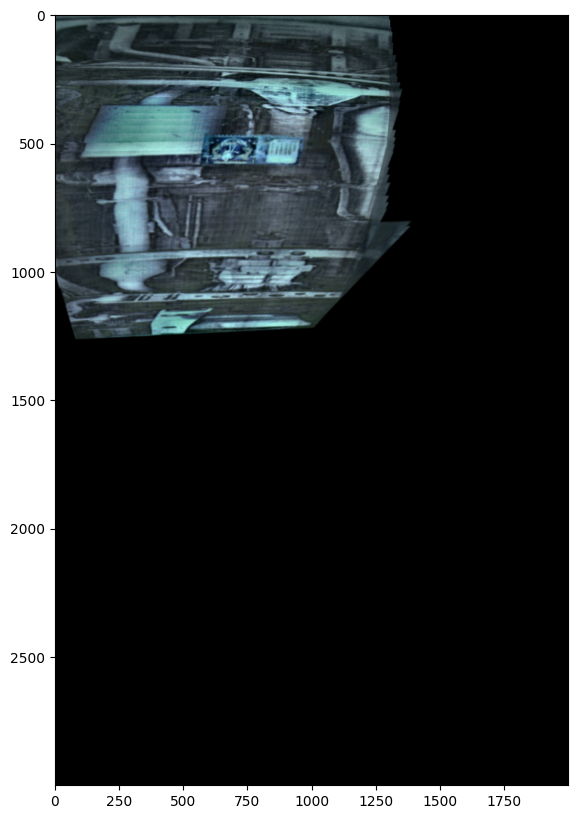

----------------------------------------------------------------------------------------------------


In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Generating the necessary txt file to input for the SuperGlue algorithm
# Generate the necessary TXT file for SuperGlue
def generate_txt_file(filename, image_pairs):
    with open(filename, 'w') as file:
        for pair in image_pairs:
            if not os.path.exists(f"cropped/output/{pair[1]}_{pair[0]}_matches.npz"):
              print("npz file already not exisiting ", f"adobe_panorama/{pair[1]}_{pair[0]}_matches.npz")  
              file.write(f"{pair[1]}.jpg {pair[0]}.jpg\n")


import subprocess

def run_superglue(input_dir, output_dir, txt_filename='adobe_panorama.txt'):
    command = [
        "python", "match_pairs.py",
        "--resize", "-1",
        "--superglue", "outdoor",
        "--max_keypoints", "2048",
        "--nms_radius", "5",
        "--resize_float",
        "--input_dir", input_dir,
        "--input_pairs", txt_filename,
        "--output_dir", output_dir,
        "--viz",
        "--keypoint_threshold", "0.05",
        "--match_threshold", "0.9"
    ]
    
    try:
        # Running the command
        subprocess.run(command, check=True)
        print("SuperGlue executed successfully!")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")


def load_npz(npz_file, output_dir):    
    npz = np.load(f'{output_dir}/{npz_file}')
    point_set1 = npz['keypoints0'][npz['matches'] > -1]
    matching_indexes = npz['matches'][npz['matches'] > -1]  
    point_set2 = npz['keypoints1'][matching_indexes]
    return point_set1, point_set2

def plt_source_images(image_set, point_set1, point_set2, input_dir):    
    im_left = cv.imread(f'{input_dir}/{image_set}.jpg', cv.IMREAD_ANYCOLOR)
    im_right = cv.imread(f'{input_dir}/{image_set-1}.jpg', cv.IMREAD_ANYCOLOR)
    
    for point in point_set1.astype(np.int32):
        cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    for point in point_set2.astype(np.int32):
        cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

    fig = plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(im_left, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122), plt.imshow(im_right, cmap='gray', vmin=0, vmax=255)
    plt.show()

def stitch_images(start_img, end_img, input_dir, output_dir, result_dir):
    npz_files = [f"{i}_{i-1}_matches.npz" for i in range(start_img + 1, end_img + 1)]
    stitched_image = cv.imread(f'{input_dir}/{start_img}.jpg', cv.IMREAD_ANYCOLOR)
    
    for img_set in range(start_img + 1, end_img + 1):  
        point_set1, point_set2 = load_npz(npz_files[img_set - start_img - 1], output_dir)
        # plt_source_images(img_set, point_set1, point_set2, input_dir)
        
        im_left = cv.imread(f'{input_dir}/{img_set}.jpg', cv.IMREAD_ANYCOLOR)
        im_right = stitched_image
        
        H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)
        
        panorama = cv.warpPerspective(im_right, np.linalg.inv(H), (2000, 3000))
        panorama[0:im_left.shape[0], 0:im_left.shape[1]] = im_left
        
        stitched_image = panorama
        
        if img_set%10==0:
            plt.figure(figsize=(10, 10))
            plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
            plt.show()    
            print("-" * 100)
    
    cv.imwrite(f'{result_dir}/final_result.jpg', stitched_image)

if __name__ == "__main__":
    # Define key parameters for easy modifications
    start_index = 1
    end_index = 48
    input_directory = 'cropped/'
    output_directory = 'cropped/output'
    result_directory = 'cropped/results'
    txt_filename = 'adobe_panorama.txt'

    # Run the functions with defined parameters
    # Run the functions with defined parameters
    first_half_pairs = [(i-1, i) for i in range(2, 49)]
    generate_txt_file(txt_filename,first_half_pairs)
    run_superglue(input_directory, output_directory, txt_filename)
    
    stitch_images(start_index, end_index, input_directory, output_directory, result_directory)
